<a href="https://colab.research.google.com/github/FizHubWasTaken/Labfiz/blob/main/MateuszWleklinski/22Young.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from math import pi

#Stal

In [ ]:
l = 1.09 # dlugość druta [m]
d = 0.8e-3 # średnica [m]
ul = 2e-3 # niepewność długości [m]
ud = 1e-5 # niepewność grubości [m]
g = 9.81 # przyspieszenie ziemskie [m/s^2]

In [ ]:
def uE(li, di, ai, uli, udi):
  u1 = 4/(pi * di ** 2 * ai) * uli
  u2 = 2 * li / (pi * di ** 3 * a) * udi
  return (u1**2 + u2**2) ** 0.5

In [ ]:
labels = [
          'Masa odważników [kg]',
          'Siła [N]',
          'Wskazanie czujnika 1 [m]',
          'Wskazanie czujnika 2 [m]',
          'Wydłużenie średnie [m]'
]
m = [i for i in range(1, 10)]
F = [mi * g for mi in m]
odch1 = """85
134
171
201
228
257
281
305
331""".split("\n")
odch1 = [float(item) * 1e-5 for item in odch1]

odch2 = """90
137
173
204
229
258
278
306
331""".split("\n")
odch2 = [float(item) * 1e-5 for item in odch2]

wydl_sr = [(odch1[i] + odch2[i])/4 for i in range(len(m))]

In [ ]:
dict = {}
for i, item in enumerate([m, F, odch1, odch2, wydl_sr]):
  dict[labels[i]] = item
tab1 = pd.DataFrame(dict)

In [ ]:
tab1

,Masa odważników [kg],Siła [N],Wskazanie czujnika 1 [m],Wskazanie czujnika 2 [m],Wydłużenie średnie [m]
0,1,9.81,0.00085,0.00090,0.000438
1,2,19.62,0.00134,0.00137,0.000678
2,3,29.43,0.00171,0.00173,0.000860
3,4,39.24,0.00201,0.00204,0.001012
4,5,49.05,0.00228,0.00229,0.001143
5,6,58.86,0.00257,0.00258,0.001288
6,7,68.67,0.00281,0.00278,0.001398
7,8,78.48,0.00305,0.00306,0.001528
8,9,88.29,0.00331,0.00331,0.001655


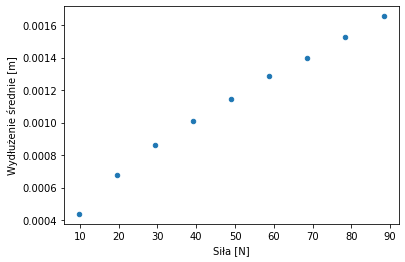

In [ ]:
tab1.plot.scatter(x='Siła [N]', y='Wydłużenie średnie [m]')

Odrzucamy 2 pierwsze pomiary

In [ ]:
tab1 = tab1.iloc[2:]

In [ ]:
tab1

,Masa odważników [kg],Siła [N],Wskazanie czujnika 1 [m],Wskazanie czujnika 2 [m],Wydłużenie średnie [m]
2,3,29.43,0.00171,0.00173,0.000860
3,4,39.24,0.00201,0.00204,0.001012
4,5,49.05,0.00228,0.00229,0.001143
5,6,58.86,0.00257,0.00258,0.001288
6,7,68.67,0.00281,0.00278,0.001398
7,8,78.48,0.00305,0.00306,0.001528
8,9,88.29,0.00331,0.00331,0.001655


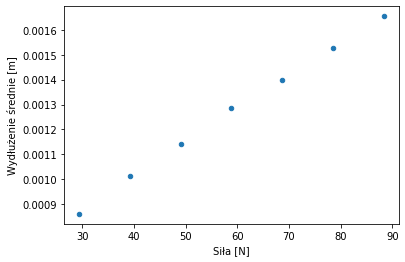

In [ ]:
tab1.plot.scatter(x='Siła [N]', y='Wydłużenie średnie [m]')

In [ ]:
x = np.array(tab1['Siła [N]']).reshape((-1, 1))
y = np.array(tab1['Wydłużenie średnie [m]'])
model = LinearRegression().fit(x, y)
a = model.coef_[0]
# (1 - model.score(x, y)) * a
a

1.336100189311199e-05

In [ ]:
E1 = 4 * l / (pi * d ** 2 * a) # Moduł Younga

In [ ]:
E1 # 162GPa

162299662628.2192

In [ ]:
uE1 = uE(l, d, a, ul, ud) # 1GPa
uE1

1057182927.0887513

#Mosiądz

In [ ]:
l = 1.098
d = 1.23e-3
ul = 2e-3
ud = 1e-5

In [ ]:
m = [0.5 * i for i in range(1, 12)]
F = [mi * g for mi in m]


odch1 = """32
56
76
94
111
128
141
154
167
182
192""".split("\n")
odch1 = [float(item) * 1e-5 for item in odch1]

odch2 = """31
55
75
95
111
127
141
155
167
178
192""".split("\n")
odch2 = [float(item) * 1e-5 for item in odch2]
wydl_sr = [(odch1[i] + odch2[i])/4 for i in range(len(m))]



In [ ]:
dict = {}
for i, item in enumerate([m, F, odch1, odch2, wydl_sr]):
  dict[labels[i]] = item
tab2 = pd.DataFrame(dict)

In [ ]:
tab2

,Masa odważników [kg],Siła [N],Wskazanie czujnika 1 [m],Wskazanie czujnika 2 [m],Wydłużenie średnie [m]
0,0.5,4.905,0.00032,0.00031,0.000158
1,1.0,9.810,0.00056,0.00055,0.000278
2,1.5,14.715,0.00076,0.00075,0.000378
3,2.0,19.620,0.00094,0.00095,0.000473
4,2.5,24.525,0.00111,0.00111,0.000555
5,3.0,29.430,0.00128,0.00127,0.000638
6,3.5,34.335,0.00141,0.00141,0.000705
7,4.0,39.240,0.00154,0.00155,0.000773
8,4.5,44.145,0.00167,0.00167,0.000835
9,5.0,49.050,0.00182,0.00178,0.000900


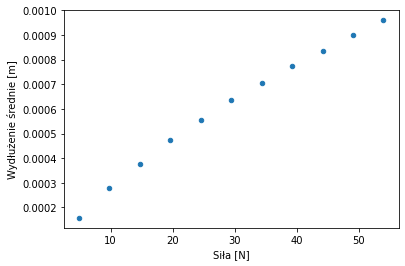

In [ ]:
tab2.plot.scatter(x="Siła [N]", y="Wydłużenie średnie [m]")

In [ ]:
tab2 = tab2.iloc[4:]

In [ ]:
tab2

,Masa odważników [kg],Siła [N],Wskazanie czujnika 1 [m],Wskazanie czujnika 2 [m],Wydłużenie średnie [m]
4,2.5,24.525,0.00111,0.00111,0.000555
5,3.0,29.430,0.00128,0.00127,0.000638
6,3.5,34.335,0.00141,0.00141,0.000705
7,4.0,39.240,0.00154,0.00155,0.000773
8,4.5,44.145,0.00167,0.00167,0.000835
9,5.0,49.050,0.00182,0.00178,0.000900
10,5.5,53.955,0.00192,0.00192,0.000960


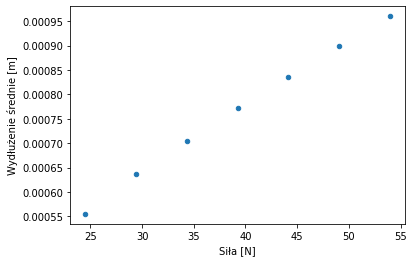

In [ ]:
tab2.plot.scatter(x="Siła [N]", y="Wydłużenie średnie [m]")

In [ ]:
x = np.array(tab2['Siła [N]']).reshape((-1, 1))
y = np.array(tab2['Wydłużenie średnie [m]'])
model = LinearRegression().fit(x, y)
a = model.coef_[0]
(1 - model.score(x, y))


0.0020689753577900483

In [ ]:
E2 = 4 * l / (pi * d ** 2 * a)

In [ ]:
E2 # 68GPa

67866846914.45799

In [ ]:
uE2 = uE(l, d, a, ul, ud) # 0.3GPa
uE2

302311530.86255777